In [27]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# import csv file

df = pd.read_csv('Ecommerce Sales Data.csv')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra�Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [29]:
#drop unrelated/blank columns

df.drop(["Status", "unnamed1"], axis = 1, inplace = True)

In [30]:
#check for null values

df.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [31]:
# drop null values

df.dropna(inplace = True)

In [10]:
df.shape

(11239, 13)

In [33]:
# change data type

df['Amount'] = df['Amount'].astype('int')

In [12]:
df['Amount'].dtype

dtype('int32')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [34]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis


## Gender

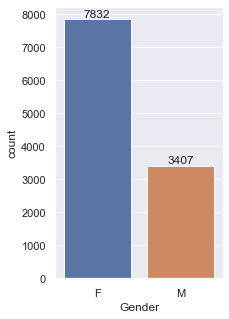

In [16]:
# plotting a bar chart for Gender and it's count

plot1 = sns.countplot(x = 'Gender',data = df)

sns.set(rc = {'figure.figsize':(3,5)})

for p in plot1.patches:
    plot1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


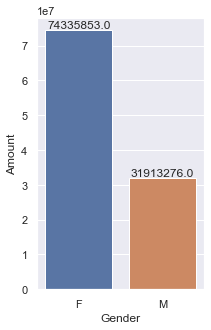

In [17]:
# plotting a bar chart for gender vs total amount

amount = df.groupby(['Gender'], as_index = False)['Amount'].sum()

sns.set(rc = {'figure.figsize':(3,5)})
plot2 = sns.barplot(x = 'Gender', y = 'Amount', data = amount)

for p in plot2.patches:
    plot2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'bottom')

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

# Age

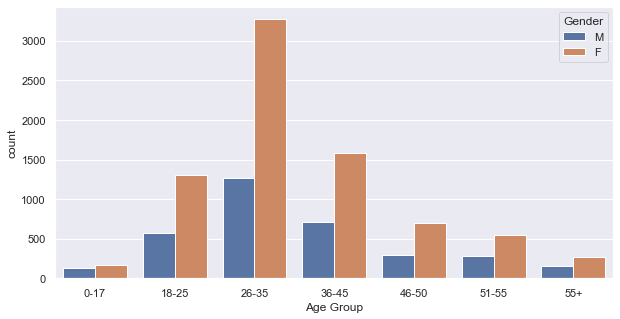

In [41]:
# Count vs Age Group

sns.set(rc = {'figure.figsize':(10,5)})
plot3 = sns.countplot(x = 'Age Group', data = df.sort_values('Age Group', ascending = True), hue = 'Gender')

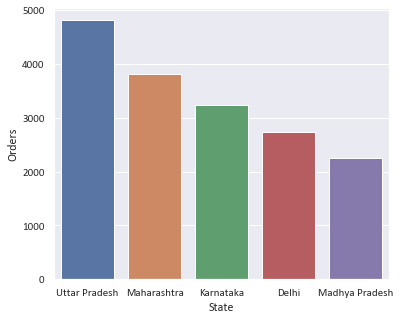

In [42]:
# total number of orders from top 5 states

new_df1 = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(5)

sns.set(rc = {'figure.figsize':(6,5)})
plt.rcParams['font.family'] = 'Calibri'

plot4 = sns.barplot(x = 'State', y = 'Orders', data = new_df1)

*From above graphs we can see that most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively*

<Axes: xlabel='Marital_Status', ylabel='count'>

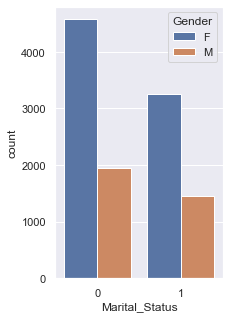

In [20]:
sns.set(rc = {'figure.figsize':(3,5)})
plot5 = sns.countplot(x = 'Marital_Status', data = df, hue = 'Gender')

plot5

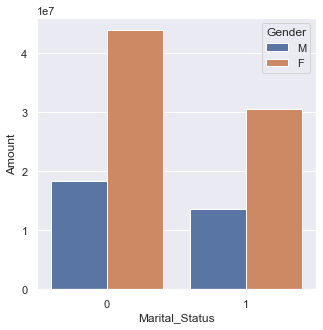

In [21]:
amount_df = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = True)

sns.set(rc = {'figure.figsize':(5,5)})
plot6 = sns.barplot(x = 'Marital_Status', y = 'Amount', data = amount_df, hue = 'Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

# Occupation

<Axes: xlabel='Occupation', ylabel='count'>

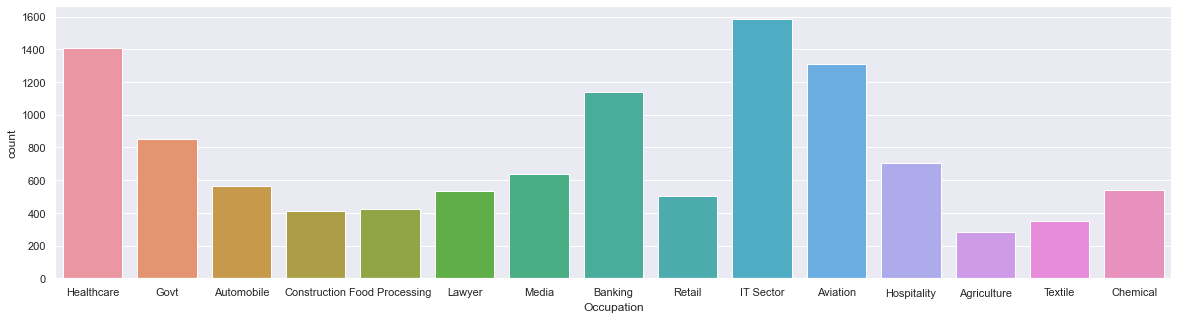

In [22]:
sns.set(rc = {'figure.figsize': (20,5)})
plt.rcParams['font.family'] = 'Arial'

plot6 = sns.countplot(data = df, x = 'Occupation')
plot6

<Axes: xlabel='Occupation', ylabel='Amount'>

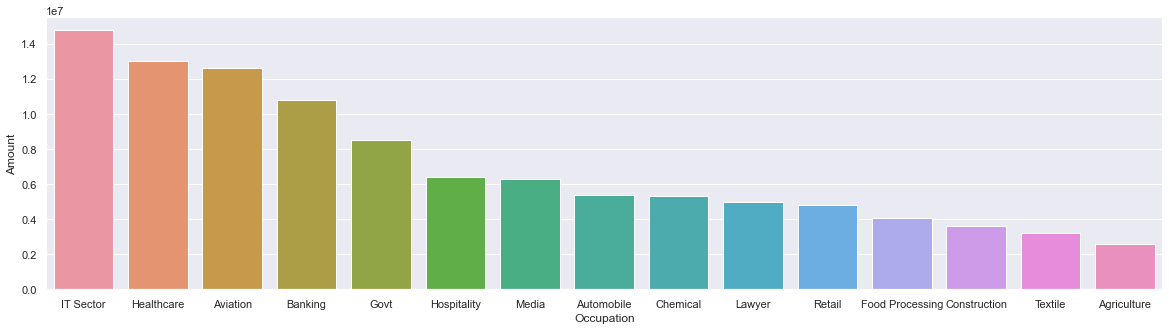

In [23]:
sns.set(rc = {'figure.figsize': (20,5)})
plt.rcParams['font.family'] = 'Arial'

new_df2 = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values('Amount', ascending = False)

plot6 = sns.barplot(data = new_df2, x = 'Occupation', y = 'Amount')
plot6

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

# Product Category

<Axes: xlabel='Product_Category', ylabel='count'>

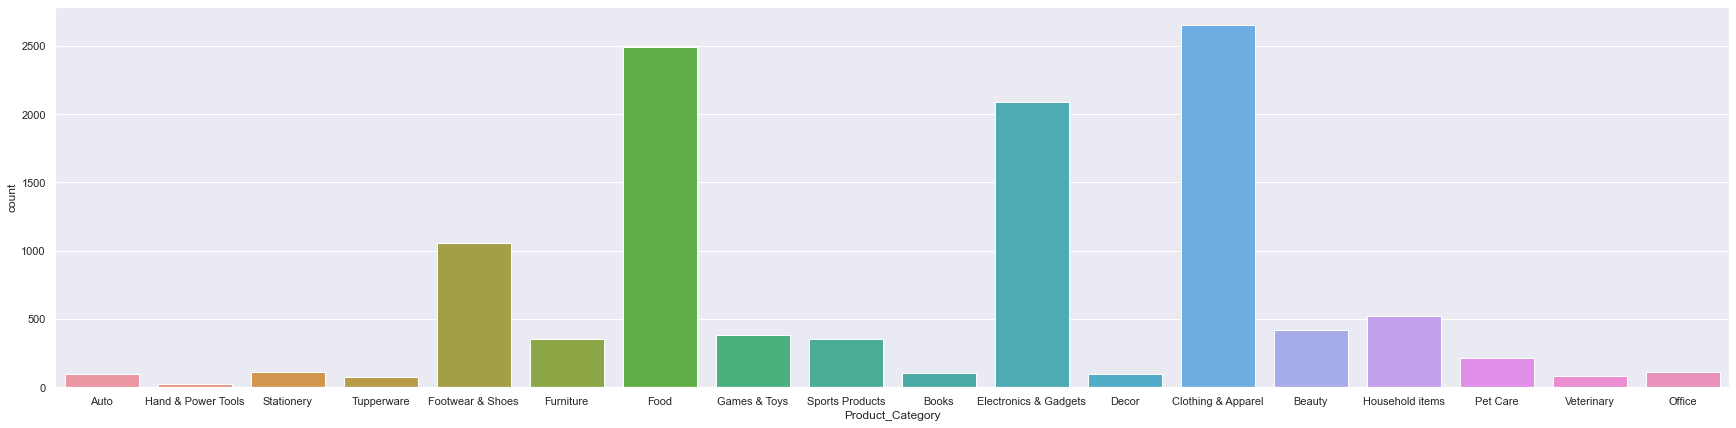

In [24]:
sns.set(rc = {'figure.figsize': (30,7)})
plt.rcParams['font.family'] = 'Arial'

plot7 = sns.countplot(data = df, x = 'Product_Category')
plot7

<Axes: xlabel='Product_Category', ylabel='Amount'>

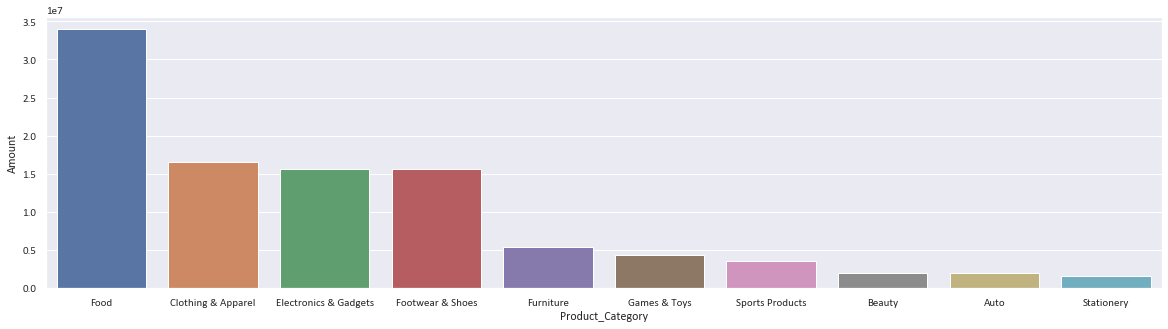

In [25]:
sns.set(rc = {'figure.figsize': (20,5)})
plt.rcParams['font.family'] = 'Calibri'

new_df3 = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values('Amount', ascending = False).head(10)

plot8 = sns.barplot(data = new_df3, x = 'Product_Category', y = 'Amount')
plot8

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

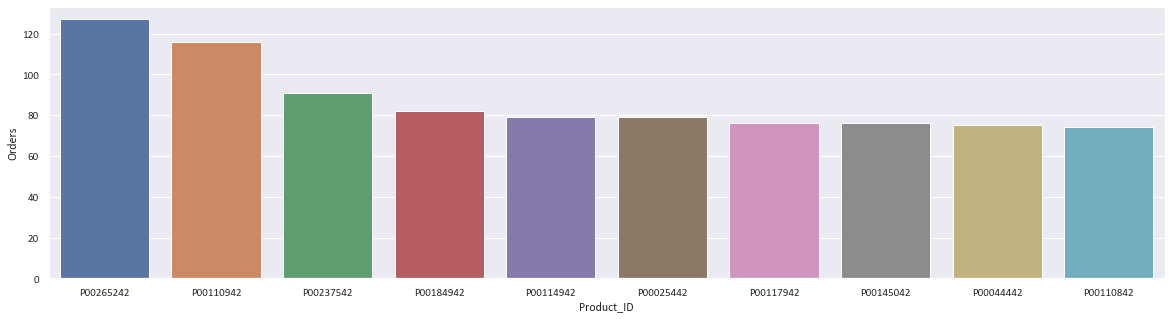

In [43]:
# top 10 most sold products 

sns.set(rc = {'figure.figsize': (20,5)})
plt.rcParams['font.family'] = 'Calibri'

new_df4 = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values('Orders', ascending = False).head(10)

plot9 = sns.barplot(data = new_df4, x = 'Product_ID', y = 'Orders')
plot9

# Conclusion:

*Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*